# Linear regression analysis (OLS) example: ProBio Case Study 

ProBio was a new line of probiotic organic juice products. Since its first product was launched in 2007, ProBio products were now on the shelves of nationwide retailers such as Whole Foods Market and Safeway. Probiotics enter the bloodstream through the stomach lining. Over 100 trillion bacteria and other microorganisms live in the intestines, and good bacteria can aid digestion and support the immune system. By 2008, the global market for probiotic and prebiotic food and beverages was substantial, at $15.4 billion, and still growing. 

As a recent start-up, ProBio did not have the funding to place nationwide advertisements. It instead allocated much of its small marketing budget to in-store demonstrations. The program originally targeted all stores that carried ProBio products. However, after a few months of trials, management noticed that exposure at smaller stores was limited and that demonstrations were only effective in stores with sufficient traffic. As a result, management modified the program to focus only on Whole Foods stores. During in-store demonstrations, ProBio representatives handed out product samples, informed consumers about the product, and offered coupons to inspire purchase. 

Another promotional program was endcap displays. The endcap is the hub at the end of an aisle—one of the store’s most popular locations. Sales representatives competed for the highest number of stores they could convince to place ProBio’s products at the endcap. The winning sales representative received a big-screen television. 

Due to limited marketing resources, management was pressured to cut any marketing expense that did not contribute to ProBio’s results. By 2009, several concerns were raised about the effectiveness of the in-store demo program. Some questioned whether the demos boosted sales at all, while others were concerned that any boost was only temporary and that sales would revert to normal levels shortly afterward. Similar concerns were raised for the endcap competition, even though management was convinced that the competition at least raised morale among sales representatives. ProBio management asked Tom Wellborn, ProBio’s marketing manager, to justify the demo and endcap program. Unless Wellborn could convince management of the programs’ efficacy, his department would be hit for budget reduction. 

Wellborn examined the sales and promotion spreadsheet from the last few months, but he could not decipher the answers that would save his department’s budget. Wellborn thought statistical analysis could be used, but was afraid that none of his staff members were suited for the job. He then recognized that ProBio’s new intern Carol Dicker had taken a business analytics course in college. He asked Dicker to assess the ProBio sales data and identify the impact of the in-store demos and endcap promotions.
 


The data came from 126 Whole Foods stores over the 10 weeks.
- Region and Store: Region and Store IDs
- Sales (Volume): The number of units sold per store per week
- Price:  The average retail price per store per week
- Sales Rep: 1 if the store had a regional sales rep (face-to-face contact) and 0 if the store had only the national sales rep (no face-to-face contact) 
- Endcap: 1 if a store participated in an endcap promotion 
- Demo: 1 if the store had a demo on the corresponding week
- Demo13: 1 if the store had a demo 1-3 weeks ago 
- Demo45: 1 if the store had a demo 4-5 weeks ago 

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### 1. Key issues ProBio faces.

- Does the in-store demo program boost the sales? If so, for how long does the sales lift last?
- Does the endcap placement of the product within the store affect the sales?
- What other factors affect sales?
- What are your recommendations?

### 2. Create a dummy variable from Endcap.

In [5]:
data = {'Product': ['A', 'B', 'C', 'D', 'E'],
        'Endcap': ['Yes', 'No', 'Yes', 'No', 'Yes']}
df = pd.DataFrame(data)
df['Endcap_Dummy'] = df['Endcap'].apply(lambda x: 1 if x == 'Yes' else 0)
print(df)

  Product Endcap  Endcap_Dummy
0       A    Yes             1
1       B     No             0
2       C    Yes             1
3       D     No             0
4       E    Yes             1


In [68]:
df = pd.read_csv('ProBio.csv')
df.head()

,date,region,store,sale,price,salerep,endcap,demo,demo13,demo45
0,5/4/2009,1,28,150.70,4.39,0,no,0,0,0
1,5/11/2009,1,28,197.40,4.00,0,no,0,0,0
2,5/18/2009,1,28,235.11,3.81,0,no,0,0,0
3,5/25/2009,1,28,226.69,3.84,0,no,0,0,0
4,6/1/2009,1,28,257.69,3.90,0,no,0,0,0


In [69]:
#  Method 1

df['end_dum']=(df.endcap=='yes')  # Boolean(true, false)
df.head()

,date,region,store,sale,price,salerep,endcap,demo,demo13,demo45,end_dum
0,5/4/2009,1,28,150.70,4.39,0,no,0,0,0,False
1,5/11/2009,1,28,197.40,4.00,0,no,0,0,0,False
2,5/18/2009,1,28,235.11,3.81,0,no,0,0,0,False
3,5/25/2009,1,28,226.69,3.84,0,no,0,0,0,False
4,6/1/2009,1,28,257.69,3.90,0,no,0,0,0,False


In [71]:
df['end_dum']=(df.endcap=='yes').astype('int')  
 # astype: Cast pandas object to specified data type (integer here)
df.head()

,date,region,store,sale,price,salerep,endcap,demo,demo13,demo45,end_dum
0,5/4/2009,1,28,150.70,4.39,0,no,0,0,0,0
1,5/11/2009,1,28,197.40,4.00,0,no,0,0,0,0
2,5/18/2009,1,28,235.11,3.81,0,no,0,0,0,0
3,5/25/2009,1,28,226.69,3.84,0,no,0,0,0,0
4,6/1/2009,1,28,257.69,3.90,0,no,0,0,0,0


In [72]:
df[df['endcap'] == 'yes'] # just for checking 

,date,region,store,sale,price,salerep,endcap,demo,demo13,demo45,end_dum
27,6/8/2009,1,41,199.93,4.41,0,yes,0,0,0,1
28,6/15/2009,1,41,217.95,4.36,0,yes,0,0,0,1
29,6/22/2009,1,41,139.61,4.39,0,yes,0,0,0,1
30,6/29/2009,1,41,106.42,4.52,0,yes,0,0,0,1
31,7/6/2009,1,41,203.74,3.90,0,yes,0,0,0,1
80,5/25/2009,1,98,265.48,4.22,0,yes,0,0,0,1
81,6/1/2009,1,98,230.49,3.96,0,yes,0,0,0,1
82,6/8/2009,1,98,119.23,4.12,0,yes,0,0,0,1
83,6/15/2009,1,98,172.05,4.22,0,yes,0,0,0,1
84,6/22/2009,1,98,189.21,4.60,0,yes,0,0,0,1


In [5]:
#  Method 2

end_dum1 = pd.get_dummies(df.endcap)
end_dum1.head()

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [6]:
df = pd.concat([df, end_dum1], axis=1) 
 # concat: Concatenate objects along a column(axis=1)
df.head()

,date,region,store,sale,price,salerep,endcap,demo,demo13,demo45,end_dum,no,yes
0,5/4/2009,1,28,150.70,4.39,0,no,0,0,0,0,1,0
1,5/11/2009,1,28,197.40,4.00,0,no,0,0,0,0,1,0
2,5/18/2009,1,28,235.11,3.81,0,no,0,0,0,0,1,0
3,5/25/2009,1,28,226.69,3.84,0,no,0,0,0,0,1,0
4,6/1/2009,1,28,257.69,3.90,0,no,0,0,0,0,1,0


In [7]:
#  Method 3

df = df.drop(['no', 'yes'], axis=1)  # Drop dummies previously created
df.head()

,date,region,store,sale,price,salerep,endcap,demo,demo13,demo45,end_dum
0,5/4/2009,1,28,150.70,4.39,0,no,0,0,0,0
1,5/11/2009,1,28,197.40,4.00,0,no,0,0,0,0
2,5/18/2009,1,28,235.11,3.81,0,no,0,0,0,0
3,5/25/2009,1,28,226.69,3.84,0,no,0,0,0,0
4,6/1/2009,1,28,257.69,3.90,0,no,0,0,0,0


In [8]:
df1=pd.get_dummies(df, columns=['endcap'], drop_first=True) 
 # endcap (original variable) is removed
 # drop_first = True: remove first category dummy
df1.head()

,date,region,store,sale,price,salerep,demo,demo13,demo45,end_dum,endcap_yes
0,5/4/2009,1,28,150.70,4.39,0,0,0,0,0,0
1,5/11/2009,1,28,197.40,4.00,0,0,0,0,0,0
2,5/18/2009,1,28,235.11,3.81,0,0,0,0,0,0
3,5/25/2009,1,28,226.69,3.84,0,0,0,0,0,0
4,6/1/2009,1,28,257.69,3.90,0,0,0,0,0,0


### 3. Report and summarize your findings from the descriptive statistics of the variables in the data except date, regiion and store IDs.

In [73]:
df.describe().round(3)

,region,store,sale,price,salerep,demo,demo13,demo45,end_dum
count,1386.000,1386.000,1386.000,1386.000,1386.000,1386.000,1386.000,1386.000,1386.000
mean,6.000,63.500,253.821,4.107,0.550,0.058,0.157,0.076,0.038
std,3.306,36.385,110.999,0.464,0.498,0.235,0.364,0.265,0.192
min,1.000,1.000,47.560,2.890,0.000,0.000,0.000,0.000,0.000
25%,3.000,32.000,189.995,3.780,0.000,0.000,0.000,0.000,0.000
50%,6.000,63.500,236.735,4.100,1.000,0.000,0.000,0.000,0.000
75%,9.000,95.000,295.808,4.428,1.000,0.000,0.000,0.000,0.000
max,11.000,126.000,1041.200,6.250,1.000,1.000,1.000,1.000,1.000


Per store and per week
- The average sales and price are 253 units and $4.1, respectively.
- Sales representatives were present in 55% of the time, on average.
- In-store demonstrations were present 5.8% of the time, on average.
- Endcap promotions were present 3.8% of the time, on average.
- Summary statistics of region and store are meaningless. They are just IDs.

### 4. Report the following descriptive statistics. What do you find?
- Sale by Demo, Sale by Salerep, Sale by Endcap

In [74]:
df.groupby('demo').sale.describe().round(3)

,count,mean,std,min,25%,50%,75%,max
demo,,,,,,,,
0,1305.0,244.716,100.211,47.56,186.57,232.06,284.68,836.32
1,81.0,400.508,162.708,196.45,314.51,359.96,413.59,1041.20


- Sales are higher when there is an in-store demonstration

In [75]:
df.groupby('salerep').sale.describe().round(3)

,count,mean,std,min,25%,50%,75%,max
salerep,,,,,,,,
0,624.0,198.712,58.028,47.56,156.645,196.465,235.665,389.76
1,762.0,298.949,123.034,66.39,228.358,276.540,331.018,1041.20


- Sales are higher when sales reps are present

In [76]:
df.groupby('end_dum').sale.describe().round(3)

,count,mean,std,min,25%,50%,75%,max
end_dum,,,,,,,,
0,1333.0,240.696,74.438,47.56,188.77,234.53,289.62,556.55
1,53.0,583.925,265.976,106.42,273.71,709.09,772.21,1041.20


- Sales are higher when there is an endcap promotion

### 5. Run correlations on the following variables: Sale, Price, Salerep, Endcap, Demo, Demo13, Demo45. 
- Which variable has the highest correlation with Sale?
- Is the correlation between Price and Endcap statistically significant at the 5% level? 

In [19]:
df[['sale', 'price', 'salerep', 'end_dum', 'demo', 'demo13', 'demo45']].corr()

,sale,price,salerep,end_dum,demo,demo13,demo45
sale,1.000000,-0.018963,0.449439,0.593216,0.329358,0.384602,0.198331
price,-0.018963,1.000000,0.328792,-0.067413,0.051840,-0.015219,0.088004
salerep,0.449439,0.328792,1.000000,0.051887,0.151264,0.242227,0.138508
end_dum,0.593216,-0.067413,0.051887,1.000000,0.078630,0.090093,-0.000215
demo,0.329358,0.051840,0.151264,0.078630,1.000000,0.036549,-0.013209
demo13,0.384602,-0.015219,0.242227,0.090093,0.036549,1.000000,0.011710
demo45,0.198331,0.088004,0.138508,-0.000215,-0.013209,0.011710,1.000000


In [17]:
df1=df[['sale', 'price', 'salerep', 'end_dum', 'demo', 'demo13', 'demo45']]

In [18]:
df1.corr()

,sale,price,salerep,end_dum,demo,demo13,demo45
sale,1.000000,-0.018963,0.449439,0.593216,0.329358,0.384602,0.198331
price,-0.018963,1.000000,0.328792,-0.067413,0.051840,-0.015219,0.088004
salerep,0.449439,0.328792,1.000000,0.051887,0.151264,0.242227,0.138508
end_dum,0.593216,-0.067413,0.051887,1.000000,0.078630,0.090093,-0.000215
demo,0.329358,0.051840,0.151264,0.078630,1.000000,0.036549,-0.013209
demo13,0.384602,-0.015219,0.242227,0.090093,0.036549,1.000000,0.011710
demo45,0.198331,0.088004,0.138508,-0.000215,-0.013209,0.011710,1.000000


In [20]:
stats.pearsonr(df1.price, df1.end_dum)  # corr and p-value

PearsonRResult(statistic=-0.0674130894701283, pvalue=0.012062353192256244)

- Endcap has the highest correlation with Sales
- The correlation between Price and Endcap is statistically significant (p-value < 5%)

- Display the correlation matrix graphically and check the significance of the correlations at 5% significance level.

In [15]:
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

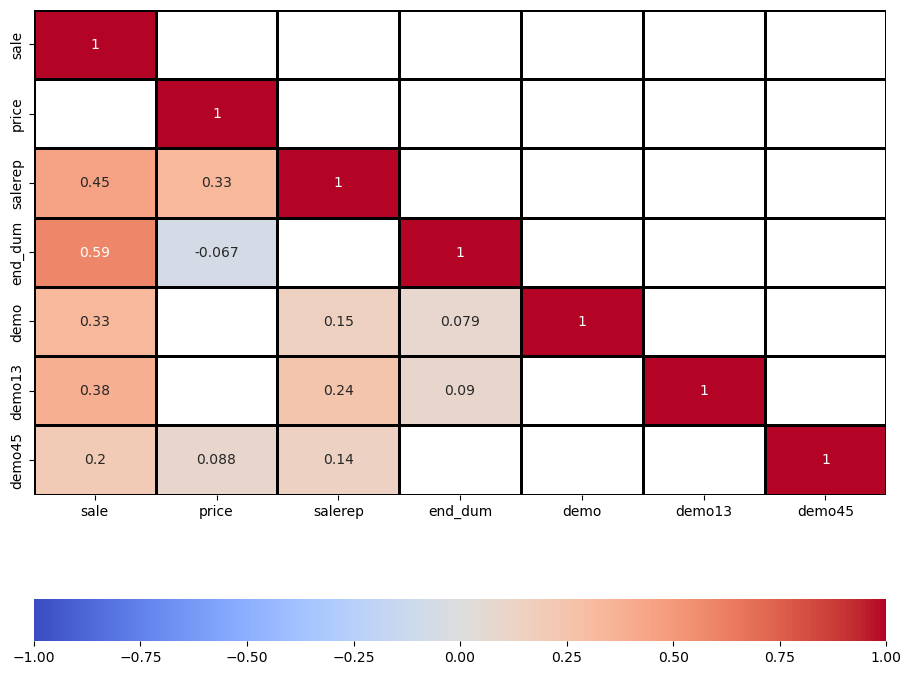

In [23]:
# Plotting with significance filter

corr = df1.corr()                            # get correlation
p_values = corr_sig(df1)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))     # mask - only get significant corr, 
                                             # tril: low triangular, invert: false -> true, true -> false #
plot_cor_matrix(corr, mask)  

### 6. Draw two graphs (Bar chart and Scatter plot) that describe the data. Explain your findings. 

<Axes: xlabel='endcap'>

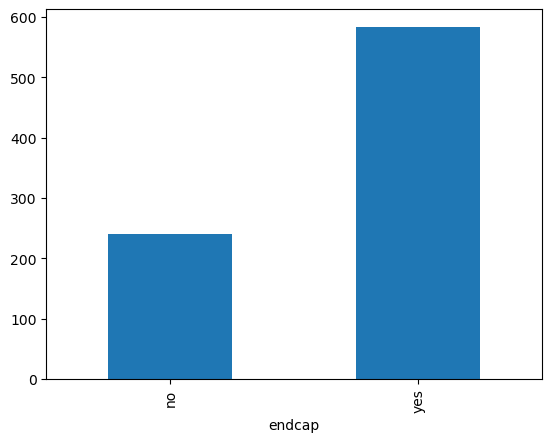

In [24]:
df.groupby('endcap').sale.mean().plot.bar()

- Sales are higher when there is an endcap promotion

<Axes: xlabel='demo'>

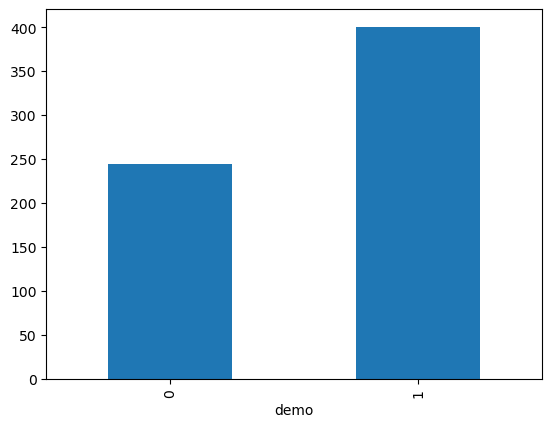

In [25]:
df.groupby('demo').sale.mean().plot.bar()

- Sales are higher when there is an in-store demonstration

<Axes: xlabel='salerep'>

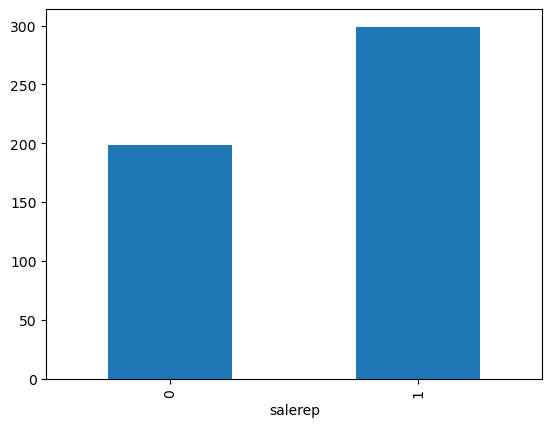

In [26]:
df.groupby('salerep').sale.mean().plot.bar()

- Sales are higher when a sale rep is present in the store

- Scatter plots with all the interest variables.

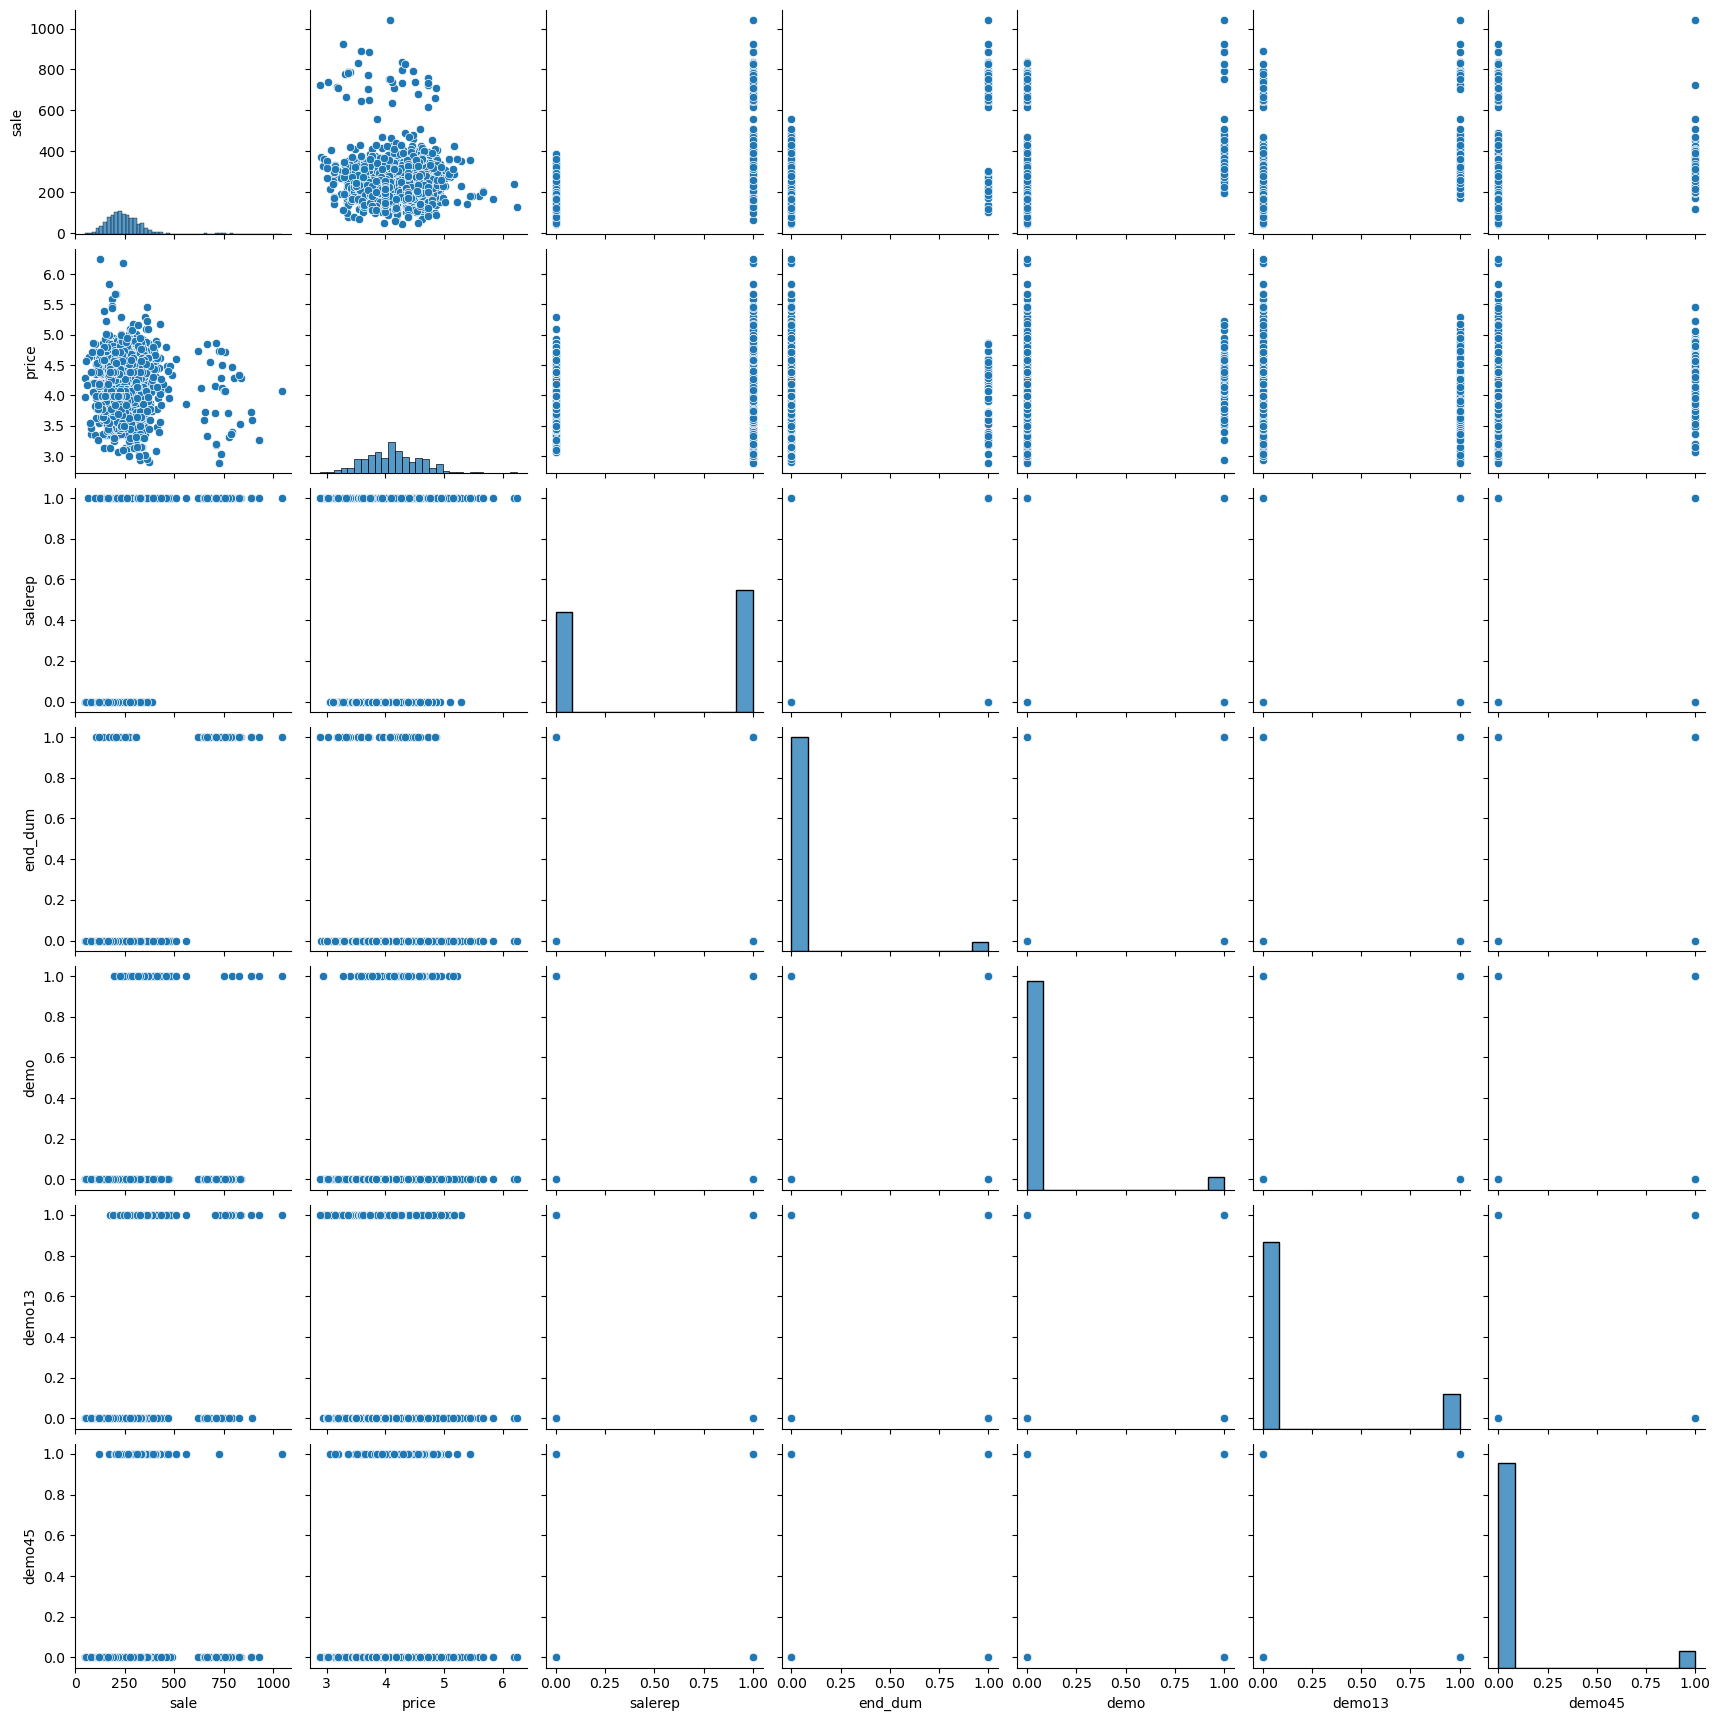

In [27]:
sns.pairplot(df1)
plt.show()

- Scatter plot between price and sale depending on endcap.

Text(0, 0.5, 'Sale')

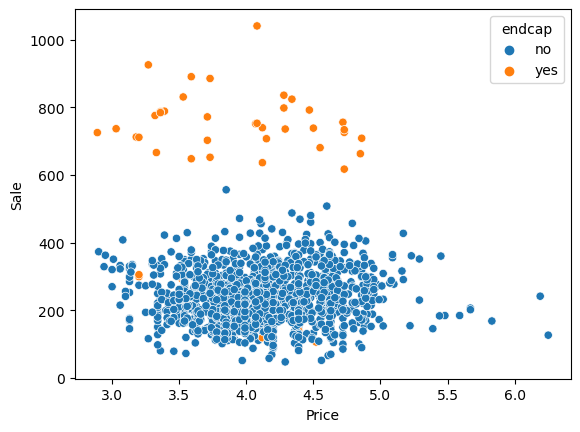

In [42]:
# scatter plot without a fitted line for each group

sns.scatterplot(x='price', y='sale', hue='endcap', data=df)
plt.xlabel("Price")
plt.ylabel("Sale")

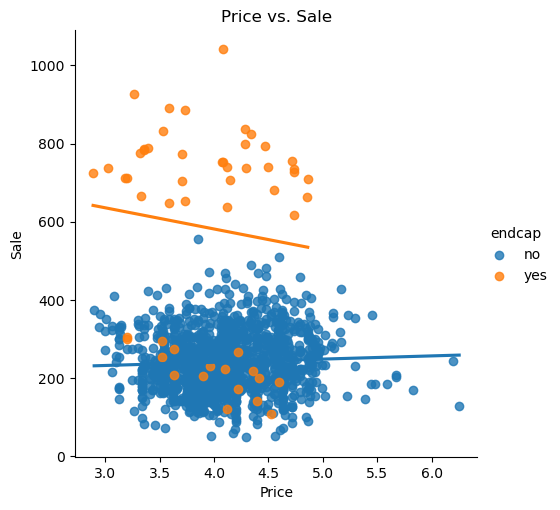

In [44]:
# scatter plot with a fitted line or/and confidence interval for each group: Use "lmplot" NOT "regplot."

sns.lmplot(x='price', y='sale', hue='endcap', data=df, ci=None) # (x,y) # ci = confidence interval, ci = 95 for a 95% confidence interval.
# sns.lmplot(x='price', y='sale', hue='endcap', data=df)

plt.xlabel("Price")
plt.ylabel("Sale")
plt.title('Price vs. Sale')

plt.show()

- Scatter plot between price and sale depending on demo.

Text(0, 0.5, 'Sale')

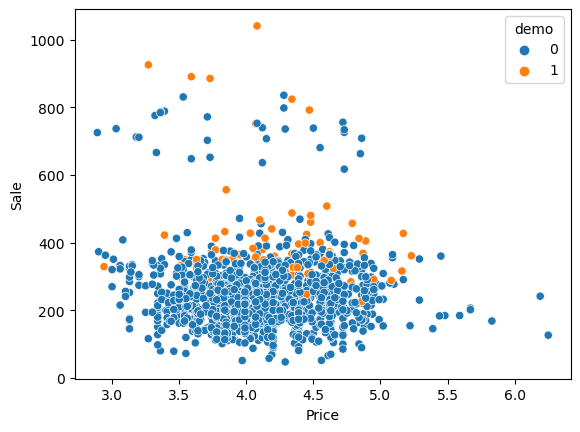

In [45]:
# scatter plot without a fitted line for each group

sns.scatterplot(x='price', y='sale', hue='demo', data=df)
plt.xlabel("Price")
plt.ylabel("Sale")

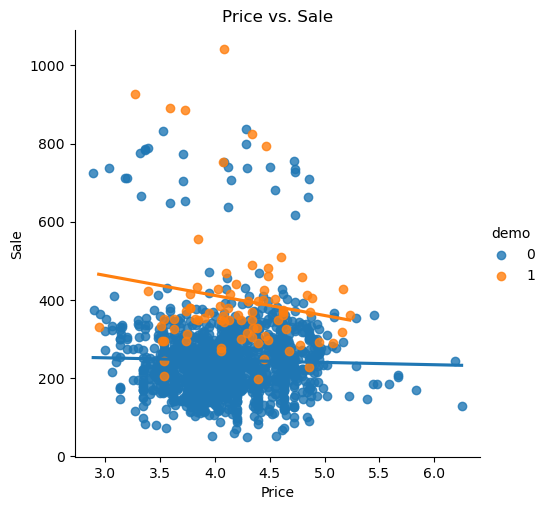

In [46]:
# scatter plot with a fitted line or/and confidence interval for each group: Use "lmplot" NOT "regplot."

sns.lmplot(x='price', y='sale', hue='demo', data=df, ci=None) # (x,y) # ci = confidence interval, ci = 95 for a 95% confidence interval.
# sns.lmplot(x='price', y='sale', hue='demo', data=df)

plt.xlabel("Price")
plt.ylabel("Sale")
plt.title('Price vs. Sale')

plt.show()

- Scatter plot between price and sale depending on salerep.

Text(0, 0.5, 'Sale')

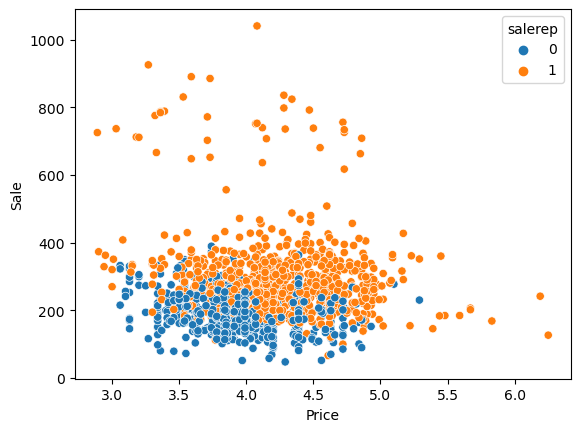

In [47]:
# scatter plot without a fitted line for each group

sns.scatterplot(x='price', y='sale', hue='salerep', data=df)
plt.xlabel("Price")
plt.ylabel("Sale")

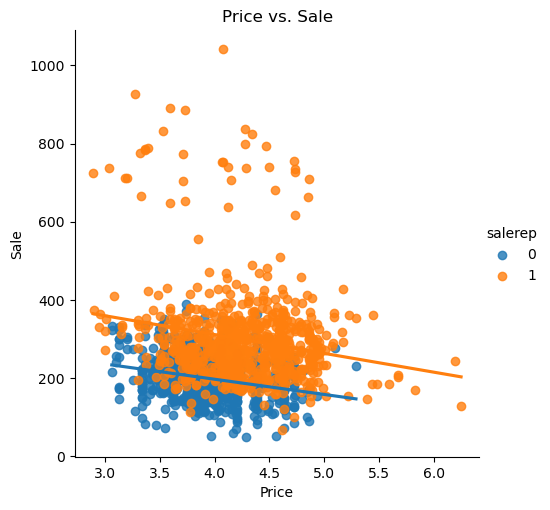

In [48]:
# scatter plot with a fitted line or/and confidence interval for each group: Use "lmplot" NOT "regplot."

sns.lmplot(x='price', y='sale', hue='salerep', data=df, ci=None) # (x,y) # ci = confidence interval, ci = 95 for a 95% confidence interval.
# sns.lmplot(x='price', y='sale', hue='salerep', data=df)

plt.xlabel("Price")
plt.ylabel("Sale")
plt.title('Price vs. Sale')

plt.show()

### 7. Report the following regression results. Which coefficients are statistically significant at the 5% level?
* Sales = b0 + b1*Price + b2*Endcap + b3*Salerep + b4*Demo + b5*Demo13 + b6*Demo45 + e

In [50]:
m=sm.OLS.from_formula('sale ~ price + end_dum + salerep + demo + demo13 + demo45', df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sale   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     471.5
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:01:35   Log-Likelihood:                -7720.4
No. Observations:                1386   AIC:                         1.545e+04
Df Residuals:                    1379   BIC:                         1.549e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    294.2650     15.789     18.638      0.000     263.292     325.237
price        -28.6277      3.945     -7.257      0.000     -36.367     -20.889
end_dum      304.9481      9.014     33.830      0.000     287.265     322.631
salerep       76.9525      3.841     20.037      0.000      69.419      84.487
demo         111.2727      7.401     15.035      0.000      96.755     125.791
demo13        73.6579      4.891     15.059      0.000      64.063      83.253
demo45        67.7059      6.539     10.354      0.000      54.878      80.534
==============================================================================
Omnibus:                      323.894   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1963.275
Skew:                          -0.942   Prob(JB):                         0.00
Kurtosis:                       8.518   Cond. No.                         41.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- All independent variables are statistically significant (p-values are less than 5%).

### 8. Interpret statistically significant coefficients. (Use 5% significance level)

- Sales decrease by 28 units when price increases by $1.
- The endcap promotion lifts sales by 305 units.
- Sales at stores with a designated sales representative increases by 77 units.
- Average sales increase by 111 units in the week of the demo.
- Average sales increase by 74 units if the demo took place between one and three weeks ago.
- Average sales increase by 68 units if the demo took place four weeks or more ago.

### 9. Do in-store demonstrations have lasting effects on sales beyond the current week?

- Demo13 and Demo45 are statistical significant. Even if the effect size decreases, the demo that took place between 1 and 3 weeks ago as well as 4 and 5 weeks ago positively affect sales.
- Thus, in-store demonstrations have a long-term effect on sales beyond the current week.

### 10. Predict sales at a store where the average price is $3, with sales rep, but no endcap, and a demonstration 3 weeks ago only. 

In [51]:
m.predict(pd.DataFrame([{'price':3, 'demo':0, 'demo13':1,
                             'demo45':0, 'salerep':1, 'end_dum':0}]))

0    358.992432
dtype: float64

### 11. Predict Sales for all samples and combine the predictions with the data.

In [58]:
predicted=m.predict(df)
predicted # not dataframe, just a pandas series

0       168.589476
1       179.754269
2       185.193527
3       184.334697
4       182.617037
           ...    
1381    168.589476
1382    168.589476
1383    168.589476
1384    174.315011
1385    174.315011
Length: 1386, dtype: float64

In [59]:
predicted=pd.DataFrame(predicted, columns=['predicted'])  # Change to dataframe
df = pd.concat([df, predicted], axis=1)
df.head()

,date,region,store,sale,price,salerep,endcap,demo,demo13,demo45,end_dum,pred,predicted
0,5/4/2009,1,28,150.70,4.39,0,no,0,0,0,0,168.589476,168.589476
1,5/11/2009,1,28,197.40,4.00,0,no,0,0,0,0,179.754269,179.754269
2,5/18/2009,1,28,235.11,3.81,0,no,0,0,0,0,185.193527,185.193527
3,5/25/2009,1,28,226.69,3.84,0,no,0,0,0,0,184.334697,184.334697
4,6/1/2009,1,28,257.69,3.90,0,no,0,0,0,0,182.617037,182.617037


###  12. Check the normality of errors by drawing a histogram of the residuals. 

In [77]:
residuals = m.resid   # resid  is the option code for generating the residuals based on the regression results ('m')

C:\Users\minchung\AppData\Local\Temp\ipykernel_32176\704267667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=10)


<Axes: ylabel='Density'>

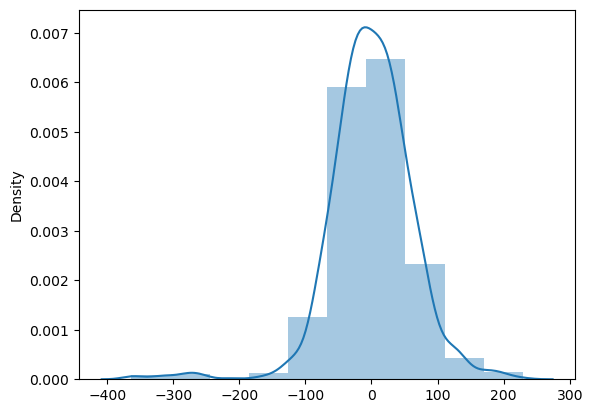

In [55]:
sns.distplot(residuals, bins=10)

#### - Checking the normality with a Q-Q plot. 

- If the residuals follow a normal distribution, the Q-Q plot should closely resemble a straight line.

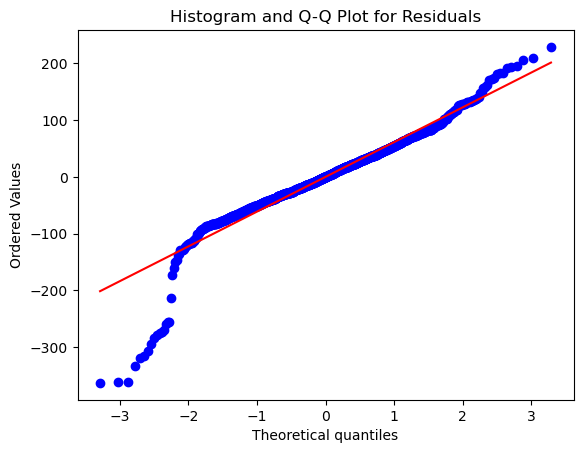

In [56]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Histogram and Q-Q Plot for Residuals")
plt.show()

###  13. Check if the homoscedasticity assumption holds by drawing a scatter plot of residuals against the predicted values. 

Text(0, 0.5, 'predicted')

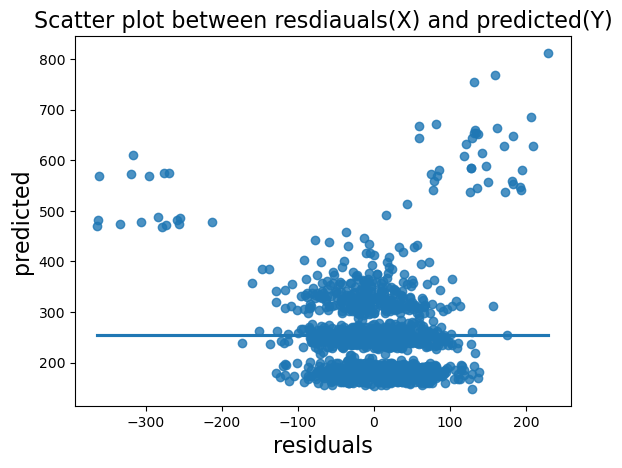

In [60]:
sns.regplot(x=residuals, y=predicted, ci=None)

plt.title('Scatter plot between resdiauals(X) and predicted(Y)', fontsize = 16)     # X-label
plt.xlabel('residuals', fontsize = 16)     # X-label
plt.ylabel('predicted', fontsize = 16)     # Y-label

- The spread of points around zero is relatively consistent across the range of predicted values so that it suggests that homoscedasticity assumption holds.

###  14. Check if the "independence of errors" assumption holds by checking Dubin-Watson statistics. 

- The Durbin-Watson statistic (1.378) is not close to 2 and between 0 and 2, which indicates a positive autocorrelation.

### 15. What are your recommendations to ProBio’s management? 

 - Based on the regression analysis, we can recommend the firm maintain the promotion program (in-store demo, endcap, sales rep) assuming that the increased cost from the promotions do not excess the increased sales.
 - However, further checking or more advanced regression techniques are needed since 'normality of errors' and 'independence of errors' assumptions do not hold.

**Postscript**: Carol Dicker was an MBA from a recognized school. The original estimation was the effect of in-store demo was minimal. Then, ProBio changed the demo program and re-ran the demo. They focused on top selling products. This change brought additional benefits. Salespeople were often confused with variety of products and could not explain each product on demo well. Now, with focused demo on top-selling products, they could effectively communicate the benefits of the products with consumers. The new results showed the effectiveness of demo and endcap. The company ended keeping demo. Their marketing program is now more focused and targeted.